## Final Project Submission

Please fill out:
* Student name: Shayan Abdul Karim Khan
* Student pace: self paced
* Scheduled project review date/time: 
* Instructor name: Abhineet Kulkarni
* Blog post URL:


## Problem Overview

Paragon Real Estate is a real estate agency with licensed operations in the King County Area. They help homeowners buy/sell homes. 

Paragon wants to be able to advice it's clients about how home renovations might increase the estimated value of their homes, and approximately by what amount. 

They want to help homeowners make smarter choices about investing in their propreties so that homeowners can understand whether a renovation will be helpful for their proprety valuable.



### Business Questions

The business questions that will be explored in this analysis are as follows:

1. What kind of renovations increases the value?
        - This will give homeowners an understanding of which renovations to focus on to increase the value of their homes and which renovations to avoid.

2. What is the impact to the value of the kind of renovations identified in the first question?
        - This will provide insight to a homeowner to understand what kind of renovations to prioritise and what kind of change can they expect.

## Data Sources

We will be using the official King County House Sales dataset to conduct analysis and answer Paragon's **Business Questions**.

## Data Understanding

The dataset listed above has following characteristics discussed in this section:

- Contents and Features of the dataset
- Relevance of the Features to the Business Questions
- Relevant features of the datasets that will be used for analysis
- Limitations of the dataset
- Avenues of analysis that will be pursued

We will start by importing the appropriate python libraries to explore the datasets.

In [959]:
import pandas as pd #imports the pandas library as pd to work on databases
import sqlite3 as sql # imports the sqlite3 library to leverage sql with pandas
from pandasql import sqldf # imports pandas sql library
import matplotlib.pyplot as plt # importing matplotlib for visualizations 
%matplotlib inline 
import numpy as np # imports the numpy library
import datetime as dt #import datetime module
import seaborn as sns #import seaborn
from collections import Counter #import Counter
import statsmodels.api as sm #import stats models
from statsmodels.stats.outliers_influence import variance_inflation_factor

#import scikit library functions
from sklearn.preprocessing import OneHotEncoder, StandardScaler 
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_validate, ShuffleSplit
from sklearn.feature_selection import RFECV


#import scipy libraries
from scipy import stats as stats

#import plotly
import plotly.express as px
import plotly.graph_objects as go

Let's import the dataset and take an intial look at it. The King County House Sales dataset is stored as `kc_house_data.csv` in the `data` folder. 

In [960]:
#import the dataset
init_data = pd.read_csv('data/kc_house_data.csv')

#take an initial look at the dataset
init_data.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors waterfront  view  ...          grade sqft_above  \
0      5650     1.0        NaN  NONE  ...      7 Average       1180   
1      7242     2.0         NO  NONE  ...      7 Average       2170   
2     10000     1.0         NO  NONE  ...  6 Low Average        770   
3      5000     1.0         NO  NONE  ...      7 Average       1050   
4      8080     1.0         NO  NONE  ...         8 Good       1680   

   sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
0            0.0     1955           0.0    98178  47.5112 -122.257   
1          400.0     1951        1991.0    98125  47.7210 -122.319   
2            0.0     1933           NaN    98028  47.7379 -122.233   
3          910.0     1965           0.0    98136  47.5208 -122.393   
4            0.0     1987           0.0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  

[5 rows x 21 columns]

Lets look at the overview of the data frame using the `.info()` function

In [961]:
init_data.info() # getting the overview info of the dataframe records

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

There are **twenty-one** columns in this dataset.

We will use the `columns_names.md` file in the `data` folder to get insights into what information these columns provide us.

We will go through the columns and try to deduce whether the information is useful enough to include as a feature in our analysis.

In [962]:
pd.DatetimeIndex(pd.to_datetime(init_data['date'])).year.min()

2014

- `id` : These are the unique identifiers of the houses. We can use this as the index to our dataframe.
<br>

- `date` : This column contains the date that the specific house was sold on. This column might be important depending on how much variation it has. Lets take a look at the range of years that we have available.
<br>



In [963]:
len(init_data['id'].unique())

21420

In [964]:
#convert string object to datetime
dt = pd.to_datetime(init_data['date'])

#convert to an array of only years
dt_yr = pd.DatetimeIndex(dt).year

#extract min and max year values
print('The oldest data we have available is for', dt_yr.min())
print(' ')
print('The newest data we have available is for', dt_yr.max())

The oldest data we have available is for 2014
 
The newest data we have available is for 2015


Looks like we have data only for **2014** and **2015**. 

This means that our predictions will be lacking data from recent years and predictions will not be taking into account inflation and recent real estate market impacts.

We do not have ample data from varying years to give us a confidence on how house prices vary by months or years. Therefore, we will drop this column also. Also, This doen't tell us anything about what kind of renovations to pursue therefore we will **ignore** this feature.

- `price` : This is the sale price of the house. This is the most important data for analysis. This data is **float** type.
<br>

- `bedrooms` : This is the number of bedrooms in a house. Intuitively, we know that bedrooms are an important factor in the value of the house. We will use this data to understand how changing the numbeer of beedroms impacts the house value.
<br>

- `bathrooms` : Similar to bedrooms, bathrooms are also an integral part of a house and intuitively, we know that they can play a part in the buying of a house therefore we will use this column for analysis. Interestingly, this dataset is a float. We know that there are 4 kinds of bathrooms: quarter bath, half bath, three-quarter bath, and a full bath. Lets make sure that the float data we have here is only in increments of 0.25.

In [965]:
#get the unique values and value counts in the bathroom columns
init_data['bathrooms'].value_counts()

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

Through visual inspectioin, it is clear that the float data meets our knowlede of the 4 types of bathrooms. Lets move onto the other columns.

- `sqft_living` : This is the square footage of living space in the house. The size of the habitable area can play a big part in the price of a house. It will be insteresting to deevelop insights into how changing the living space square footage can impact the value of a house.
<br>

- `sqft_lot` : This columns contains the total siz of the property in square footage. Similar to the habitable area, the total size of the property is also an impoortant factor to consider when deducing house prices. Nonetheless, it is not something that can be changed through renovations. Therefore, we will **ignore** this column.
<br>

- `floors` : This is data on how many levels a house has. Generally, floors are also an important factor in a house price. Intuitively, this feature is tied together with `sqft_living` but it will be important to investigate how changes in the number of floors impacts the value of the house. Interestingly, this data is **float** type. We know from domain knowledge that there are full floors and half floors. Lets investigate to make sure that the data meets our domain knowledge assumptions.

In [966]:
#extract unique value counts
init_data['floors'].value_counts()

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

Looks like we either have full floors and half floors therefore this data should be good. We can move onto investigating the remaining columns.

- `waterfront` : This column contains information on whether a house is on a waterfront. Watrefront properties are generally known to be more valuable but this isn't something that can be changed through renovations therefore it won't help us answer the business questions. We will **ignore** this column in our analysis.


- `view` : This is the quality of view from the house. The quality of view is highly subjective to individual preferences and we don't have information on the basis for the quality. Also, the quality of view isn't something that can be renovated therefore we will **ignore** this column.
<br>

- `condition` : This data shows how good the overall condition of the house is. It is related to maintenance of the house. Intuitively, we know that the condition of the house plays a big part in the house value. This is also something that can be improved through renovations. Lets investigate what kind of data this columns contains.


In [967]:
#extract unique value counts
init_data['condition'].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

Looks like these are categories stored in string format. We can process these later and convert them to integers to make them easire to work with. The codes respective to these descriptions listed on the King Coounty Assessor website is as follows:

1 = Poor- Worn out. Repair and overhaul needed on painted surfaces, roofing, plumbing, heating and numerous functional inadequacies. Excessive deferred maintenance and abuse, limited value-in-use, approaching abandonment or major reconstruction; reuse or change in occupancy is imminent. Effective age is near the end of the scale regardless of the actual chronological age.

2 = Fair- Badly worn. Much repair needed. Many items need refinishing or overhauling, deferred maintenance obvious, inadequate building utility and systems all shortening the life expectancy and increasing the effective age.

3 = Average- Some evidence of deferred maintenance and normal obsolescence with age in that a few minor repairs are needed, along with some refinishing. All major components still functional and contributing toward an extended life expectancy. Effective age and utility is standard for like properties of its class and usage.

4 = Good- No obvious maintenance required but neither is everything new. Appearance and utility are above the standard and the overall effective age will be lower than the typical property.

5= Very Good- All items well maintained, many having been overhauled and repaired as they have shown signs of wear, increasing the life expectancy and lowering the effective age with little deterioration or obsolescence evident with a high degree of utility.

- `grade` : This is the overall grade of the house which is related to the construction and design of the house. The Kings County Assessor provides official information on these grades found below:
<br>

    - Grades run from grade 1 to 13. Generally defined as:

        - 1-3 Falls short of minimum building standards. Normally cabin or inferior structure.

        - 4 Generally older, low quality construction. Does not meet code.

        - 5 Low construction costs and workmanship. Small, simple design.

        - 6 Lowest grade currently meeting building code. Low quality materials and simple designs.

        - 7 Average grade of construction and design. Commonly seen in plats and older sub-divisions.

        - 8 Just above average in construction and design. Usually better materials in both the exterior and interior finish work.

        - 9 Better architectural design with extra interior and exterior design and quality.

        - 10 Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.

        - 11 Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.

        - 12 Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.

        - 13 Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc.

<br>
These grade descriptions tell us that it is possible to jump into higher grades through reenovations and house improvements. This would be an interesting feature to investigate to develop insights for the user. 

Lets investigate whether the values in this column match up with the official information.

In [968]:
#extract unique value counts
init_data['grade'].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

The data matches up with the official information. We can do some pre-processing to make it easier to work with this data which we'll explore later.

One thing to note is that from the King County assessor website, we know that `condition` is relative to `grade`. Lets use the groupby function to inspect the descriptive values of the two features to understand how they are related. Since the `condition` column is more generalized, we'll use that as the primary grouper and see what range of `grade` values does it cover.

In [969]:
#setting up the pivot table
init_data.groupby(['condition','grade'])['grade'].count()


condition  grade        
Average    10 Very Good      921
           11 Excellent      332
           12 Luxury          73
           13 Mansion         11
           4 Low              12
           5 Fair            100
           6 Low Average    1035
           7 Average        5229
           8 Good           4266
           9 Better         2041
Fair       10 Very Good        2
           4 Low               4
           5 Fair             15
           6 Low Average      59
           7 Average          75
           8 Good             13
           9 Better            2
Good       10 Very Good      156
           11 Excellent       56
           12 Luxury          13
           13 Mansion          2
           4 Low              10
           5 Fair             84
           6 Low Average     685
           7 Average        2831
           8 Good           1394
           9 Better          446
Poor       4 Low               1
           5 Fair              9
           6 Low A

We can see that every level of `condition` has multiple `grade` types. This tells us that a higher grade doeesn't necessarily mean a better condition. For instance, we see that there are **mansions** that are in **Average** conditions while there are also buildings likee cabins that are categorized as **poor** grade but are in **Very Good** condition. Therefore, we have to look at both of these variables during analysis.

- `sqft_above` : This is square footage of house apart from basement. With the total square feet already available, it would not be extra insightful to look at the separate square footage. Therefore, we will **ignore** this column.
<br>

- `sqft_basement` : This is square footage of the basement. Similiar to the previous column, this won't add major insights for us with the total square footage already available. Therefore, we will **ignore** this column.
<br>

- `yr_built` : This column contains the year when the house was built. This is important information for estimating the house value because the age of a house can both be a pro or a con depending on the type of buyer and type of property. Nonetheless, this is not something that we can change or renovate therefore it will not providee valuable insights to answer the business questions. Therefore, we will **ignore** this column.
<br>

- `yr_renovated` : This is the year that the house was renovated in. Without more information on what kind of renovation took place, this data can be highly misleading because reenovations can be major overhaul or smaller improvements. For this reason, we will **ignore** this data.
<br>

- `zipcode` : This is the Zip Code that the property is located in which is used by the United States Postal Service. Zipcodes play a big part in establishing the value of a house because of different factors like rate of crime, school quality, etc. Nonetheless, this isn't something that can be changed. This can be something that is looked at separately in conjunction with the other factors at play in a neighbourhood to identify areas of most return on investment. But for the purpose of answering our business questions, wee will **ignore** this feature.
<br>

- `lat` : This is the latitude coordinates of the house. This is the same case as zipcode therefore we will **ignore** this feature also.
<br>

- `long` : This is the longitude coordinates of the house. Same casee as latitude, we will **ignore** this feature.
<br>

- `sqft_living15` : This is the square footage of interior housing living space for the nearest 15 neighbors. This isn't something that a homeowner looking to renovate has control over therefore we wwill **ignore** this data.
<br>

- `sqft_lot15` : This is the square footage of the land lots of the nearest 15 neighbors. Similar to the previous column, we will **ignore** this data because a homeowner doesn't have control over this feature.
<br>


### Summary

Out of the **21 features** that this dataset has, we were able to identify **6 features** which can bee helpful in answering the business questions of our client. Before we review th features that we will be using, lets look at the features we will be ignoring.

#### Columns/Features to be ignored

Allthough these features can be important in determining th value of the house, they are being ignored because of one or both of the reasons listed below:

1. They can't be changed through renovation
2. They are linked to other more insightful features which we have chosen instead.

The features to be ignored are: 

- `date`
- `sqft_lot`
- `waterfront`
- `view`
- `sqft_above`
- `sqft_basement`
- `yr_built`
- `yr_renovated`
- `zipcode`
- `lat`
- `long`
- `sqft_living15`
- `sqft_lot15`

#### Columns/Features carried forward

The features we are carrying forward and howw they will help us answer the business questions are the following:
- `price`: This is the main target that we will bee investigating and the only sourcee to find out the house price
<br>

- `bedrooms`: This will help us identify whether increasing thee bedrooms increases the house value. This will also inform a homeowner of how important the number of bedrooms are for their house price.
<br>

- `bathrooms`: Similar to number of bedrooms, this will help homeowners identify whether adding bathrooms increases their house value.
<br>

- `sqft_living`: This will provide insights to the homeowner if increasing the living space by adding another floor or building an extension is a valuable renovation or not.
<br>

- `conditions`: This provides a qualitative and quantitative assessment of categorically grouping the condition of the house. This can provide valuable insights into how changing th condition can affect the value of the house. This can help homeowners identify exactly what kind of requirements they need to meet to jump to a better condition and help plan for more impactful renovations.
<br>

- `grade`: This is the more thorough categories of the quality of construction and the house. The condition data is related to it and as shown above, it will be important to investigate the relation of this in conjunction to to other variables in determining types and impacts of renovations.

#### Data Limitations

no way of identifying the cost effectiveness, detailed kind of renovation, difficulty of renovation, equity of improvment, location specific improvements. inflation impact, housing market trends, lack of more recent data

#### Avenues of Analysis 

Linear Regression vs simple analysis pros and cons

## Data Preparation

The following steps will be followed in preparing the data:

- Data Cleaning
<br>

- Data Processing for Regression
<br>

### Data Cleaning

Lets start with selecting the columns we will be using.

In [970]:
#copy dataframe to avoid changing the original data
data_cln = init_data.copy()

#note the columns to keep
col_kp = ['id','price','bedrooms','bathrooms','floors','sqft_living','condition','grade','yr_built','sqft_lot',
         ]

#seleect the column to use
data_cln = data_cln[col_kp]

#preview the info
print(data_cln.info())

#preview the data
data_cln.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21597 non-null  int64  
 1   price        21597 non-null  float64
 2   bedrooms     21597 non-null  int64  
 3   bathrooms    21597 non-null  float64
 4   floors       21597 non-null  float64
 5   sqft_living  21597 non-null  int64  
 6   condition    21597 non-null  object 
 7   grade        21597 non-null  object 
 8   yr_built     21597 non-null  int64  
 9   sqft_lot     21597 non-null  int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 1.6+ MB
None


id     price  bedrooms  bathrooms  floors  sqft_living  condition  \
0  7129300520  221900.0         3       1.00     1.0         1180    Average   
1  6414100192  538000.0         3       2.25     2.0         2570    Average   
2  5631500400  180000.0         2       1.00     1.0          770    Average   
3  2487200875  604000.0         4       3.00     1.0         1960  Very Good   
4  1954400510  510000.0         3       2.00     1.0         1680    Average   

           grade  yr_built  sqft_lot  
0      7 Average      1955      5650  
1      7 Average      1951      7242  
2  6 Low Average      1933     10000  
3      7 Average      1965      5000  
4         8 Good      1987      8080

Lets set `id` as the index for thhe dataframe. This will be the main use of the `id` column

In [971]:
#reset index to id column
data_cln = data_cln.set_index('id')

#preview the data
print(data_cln.info())
data_cln.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   bedrooms     21597 non-null  int64  
 2   bathrooms    21597 non-null  float64
 3   floors       21597 non-null  float64
 4   sqft_living  21597 non-null  int64  
 5   condition    21597 non-null  object 
 6   grade        21597 non-null  object 
 7   yr_built     21597 non-null  int64  
 8   sqft_lot     21597 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 1.6+ MB
None


price  bedrooms  bathrooms  floors  sqft_living  condition  \
id                                                                          
7129300520  221900.0         3       1.00     1.0         1180    Average   
6414100192  538000.0         3       2.25     2.0         2570    Average   
5631500400  180000.0         2       1.00     1.0          770    Average   
2487200875  604000.0         4       3.00     1.0         1960  Very Good   
1954400510  510000.0         3       2.00     1.0         1680    Average   

                    grade  yr_built  sqft_lot  
id                                             
7129300520      7 Average      1955      5650  
6414100192      7 Average      1951      7242  
5631500400  6 Low Average      1933     10000  
2487200875      7 Average      1965      5000  
1954400510         8 Good      1987      8080

Lets seperate grade descriptions and numbers so that we can process them seperately if we need to.

In [972]:
#split the grade column into 2 new columns
data_cln[['grade#', 'grade_desc']] = data_cln['grade'].str.split(' ', 1, expand=True)

#drop the grade column
data_cln.drop(['grade'],axis=1, inplace=True)

#convert grade# column to int64
data_cln['grade#'] = data_cln['grade#'].astype('int64')
#preview the data
print(data_cln.info())
data_cln.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   bedrooms     21597 non-null  int64  
 2   bathrooms    21597 non-null  float64
 3   floors       21597 non-null  float64
 4   sqft_living  21597 non-null  int64  
 5   condition    21597 non-null  object 
 6   yr_built     21597 non-null  int64  
 7   sqft_lot     21597 non-null  int64  
 8   grade#       21597 non-null  int64  
 9   grade_desc   21597 non-null  object 
dtypes: float64(3), int64(5), object(2)
memory usage: 1.8+ MB
None


price  bedrooms  bathrooms  floors  sqft_living  condition  \
id                                                                          
7129300520  221900.0         3       1.00     1.0         1180    Average   
6414100192  538000.0         3       2.25     2.0         2570    Average   
5631500400  180000.0         2       1.00     1.0          770    Average   
2487200875  604000.0         4       3.00     1.0         1960  Very Good   
1954400510  510000.0         3       2.00     1.0         1680    Average   

            yr_built  sqft_lot  grade#   grade_desc  
id                                                   
7129300520      1955      5650       7      Average  
6414100192      1951      7242       7      Average  
5631500400      1933     10000       6  Low Average  
2487200875      1965      5000       7      Average  
1954400510      1987      8080       8         Good

Using the `column_names.md` file and the King County Assessor website, lets add a column with the respective condition numbers for the condition descriptions in the `condition` column.

The building conditions are coded from 1-5. They are coded as follows:

1 = Poor

2 = Fair

3 = Average

4 = Good

5= Very Good

In [973]:
#check the values in the condition column
data_cln['condition'].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

In [974]:
#create a dictionary of the description and codes
cond_cd = {'Poor':1, 'Fair':2, 'Average':3, 'Good':4, 'Very Good':5}

#map evey condition record and compare with the the dictionary to create a new column
data_cln['cond_code'] = data_cln['condition'].map(lambda x: cond_cd[x])

#preview the data
print(data_cln.info())
data_cln.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   bedrooms     21597 non-null  int64  
 2   bathrooms    21597 non-null  float64
 3   floors       21597 non-null  float64
 4   sqft_living  21597 non-null  int64  
 5   condition    21597 non-null  object 
 6   yr_built     21597 non-null  int64  
 7   sqft_lot     21597 non-null  int64  
 8   grade#       21597 non-null  int64  
 9   grade_desc   21597 non-null  object 
 10  cond_code    21597 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 2.0+ MB
None


price  bedrooms  bathrooms  floors  sqft_living  condition  \
id                                                                          
7129300520  221900.0         3       1.00     1.0         1180    Average   
6414100192  538000.0         3       2.25     2.0         2570    Average   
5631500400  180000.0         2       1.00     1.0          770    Average   
2487200875  604000.0         4       3.00     1.0         1960  Very Good   
1954400510  510000.0         3       2.00     1.0         1680    Average   

            yr_built  sqft_lot  grade#   grade_desc  cond_code  
id                                                              
7129300520      1955      5650       7      Average          3  
6414100192      1951      7242       7      Average          3  
5631500400      1933     10000       6  Low Average          3  
2487200875      1965      5000       7      Average          5  
1954400510      1987      8080       8         Good          3

Lastly, to make our `price` column easier to work with, lets change the scale to **$100,000**.

In [975]:
#divide the price column by 100000
data_cln['price'] = data_cln['price']/100000


In [976]:
#rename the price column
data_cln.rename(columns={'price':'price($100,000)'},inplace=True)

#preview the dataframe
data_cln.head()

price($100,000)  bedrooms  bathrooms  floors  sqft_living  \
id                                                                      
7129300520            2.219         3       1.00     1.0         1180   
6414100192            5.380         3       2.25     2.0         2570   
5631500400            1.800         2       1.00     1.0          770   
2487200875            6.040         4       3.00     1.0         1960   
1954400510            5.100         3       2.00     1.0         1680   

            condition  yr_built  sqft_lot  grade#   grade_desc  cond_code  
id                                                                         
7129300520    Average      1955      5650       7      Average          3  
6414100192    Average      1951      7242       7      Average          3  
5631500400    Average      1933     10000       6  Low Average          3  
2487200875  Very Good      1965      5000       7      Average          5  
1954400510    Average      1987      8080       8         Good          3

That should end the data cleaning process. We will now process this data to prepare it for regression analysis.

### Data Preparation for Regression Analysis

Lets start with separating the target variable, i.e `price`.

Lets take a look at the distribution of the target variable to get an understanding of how the data is distributed.

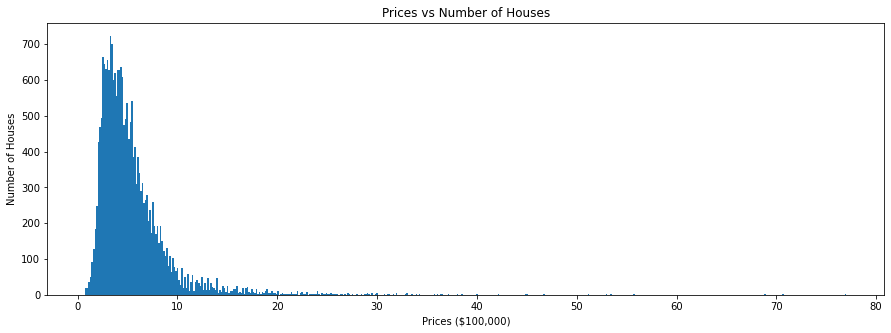

In [977]:
#defining the skeletion of the graph
fig, ax = plt.subplots(figsize=(15,5))

#plotting the histogram
ax.hist(data_cln['price($100,000)'],bins=500);

#seetting titles and axis labels
ax.set_title('Prices vs Number of Houses');
ax.set_xlabel('Prices ($100,000)');
ax.set_ylabel('Number of Houses');

We can see a right-skewed normal distribution with very few houses above **$1 million**. 

Lets take a quick look at how the correlation between the different variables and the targtet variable of price changes as we go over **$1 million** as compared to if wee stay under that.

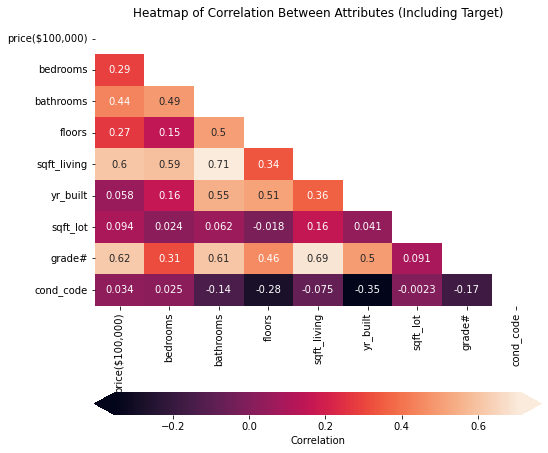

In [978]:
# Create a df with the target as the first column,
# then compute the correlation matrix
# heatmap_data = pd.concat([y_train, X_train], axis=1)
corr = data_cln[data_cln['price($100,000)']<=10].corr()

# Set up figure and axes
fig, ax = plt.subplots(figsize=(8, 8))

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
sns.heatmap(
    # Specifies the data to be plotted
    data=corr,
    # The mask means we only show half the values,
    # instead of showing duplicates. It's optional.
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    # Specifies that we should use the existing axes
    ax=ax,
    # Specifies that we want labels, not just colors
    annot=True,
    # Customizes colorbar appearance
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

Interestingly, there is not a lot of difference except for correlatin of `price` and `grade#`.

The other trends remain the same. We can't accept to create a prefect model for all scenarios and we will try to fit our regression model so that it has the minimum error when evaluating prices for all price scenarios.

Now lets take a look at the correlation of our complete dataset.

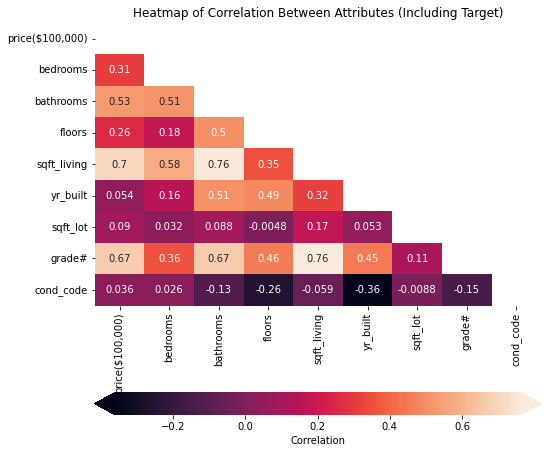

In [979]:
# Create a df with the target as the first column,
# then compute the correlation matrix
# heatmap_data = pd.concat([y_train, X_train], axis=1)
corr = data_cln.corr()

# Set up figure and axes
fig, ax = plt.subplots(figsize=(8, 8))

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
sns.heatmap(
    # Specifies the data to be plotted
    data=corr,
    # The mask means we only show half the values,
    # instead of showing duplicates. It's optional.
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    # Specifies that we should use the existing axes
    ax=ax,
    # Specifies that we want labels, not just colors
    annot=True,
    # Customizes colorbar appearance
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

Based on thee plot abovee, `sqft_living` is the most correlated feature with `price`. We will use this feature to create the baseline model beforee iterating on it. 

`grade#` is the second highest correlated feature.

`cond_code` has vrey little correlation with the `price` of a house which shows that this feature should be ignored.

Another interesting observation is the high correlation between `grade#`, `sqft_living`, and `bathrooms`.

We will investigate models with combinations of all these variables to generate the most appropriate regression model.

Before we move onto creating the model, we still need to investigate these variables for other propreties and transform them if needed.

Lets start with checking which variables are **categorical** variables after dropping `cond_code` and`condition` since those two columns belong to the same variable. We will also drop `grade_desc` since we can always reference thee `grade#` to get the description from the original dataset.

In [980]:
#drop cond_code and condition
data_cln.drop(['cond_code','grade#','bathrooms','bedrooms','floors'],axis=1,inplace=True)#,'grade_desc','bathrooms'

In [981]:
data_cln

price($100,000)  sqft_living  condition  yr_built  sqft_lot  \
id                                                                        
7129300520          2.21900         1180    Average      1955      5650   
6414100192          5.38000         2570    Average      1951      7242   
5631500400          1.80000          770    Average      1933     10000   
2487200875          6.04000         1960  Very Good      1965      5000   
1954400510          5.10000         1680    Average      1987      8080   
...                     ...          ...        ...       ...       ...   
263000018           3.60000         1530    Average      2009      1131   
6600060120          4.00000         2310    Average      2014      5813   
1523300141          4.02101         1020    Average      2009      1350   
291310100           4.00000         1600    Average      2004      2388   
1523300157          3.25000         1020    Average      2008      1076   

             grade_desc  
id                       
7129300520      Average  
6414100192      Average  
5631500400  Low Average  
2487200875      Average  
1954400510         Good  
...                 ...  
263000018          Good  
6600060120         Good  
1523300141      Average  
291310100          Good  
1523300157      Average  

[21597 rows x 6 columns]

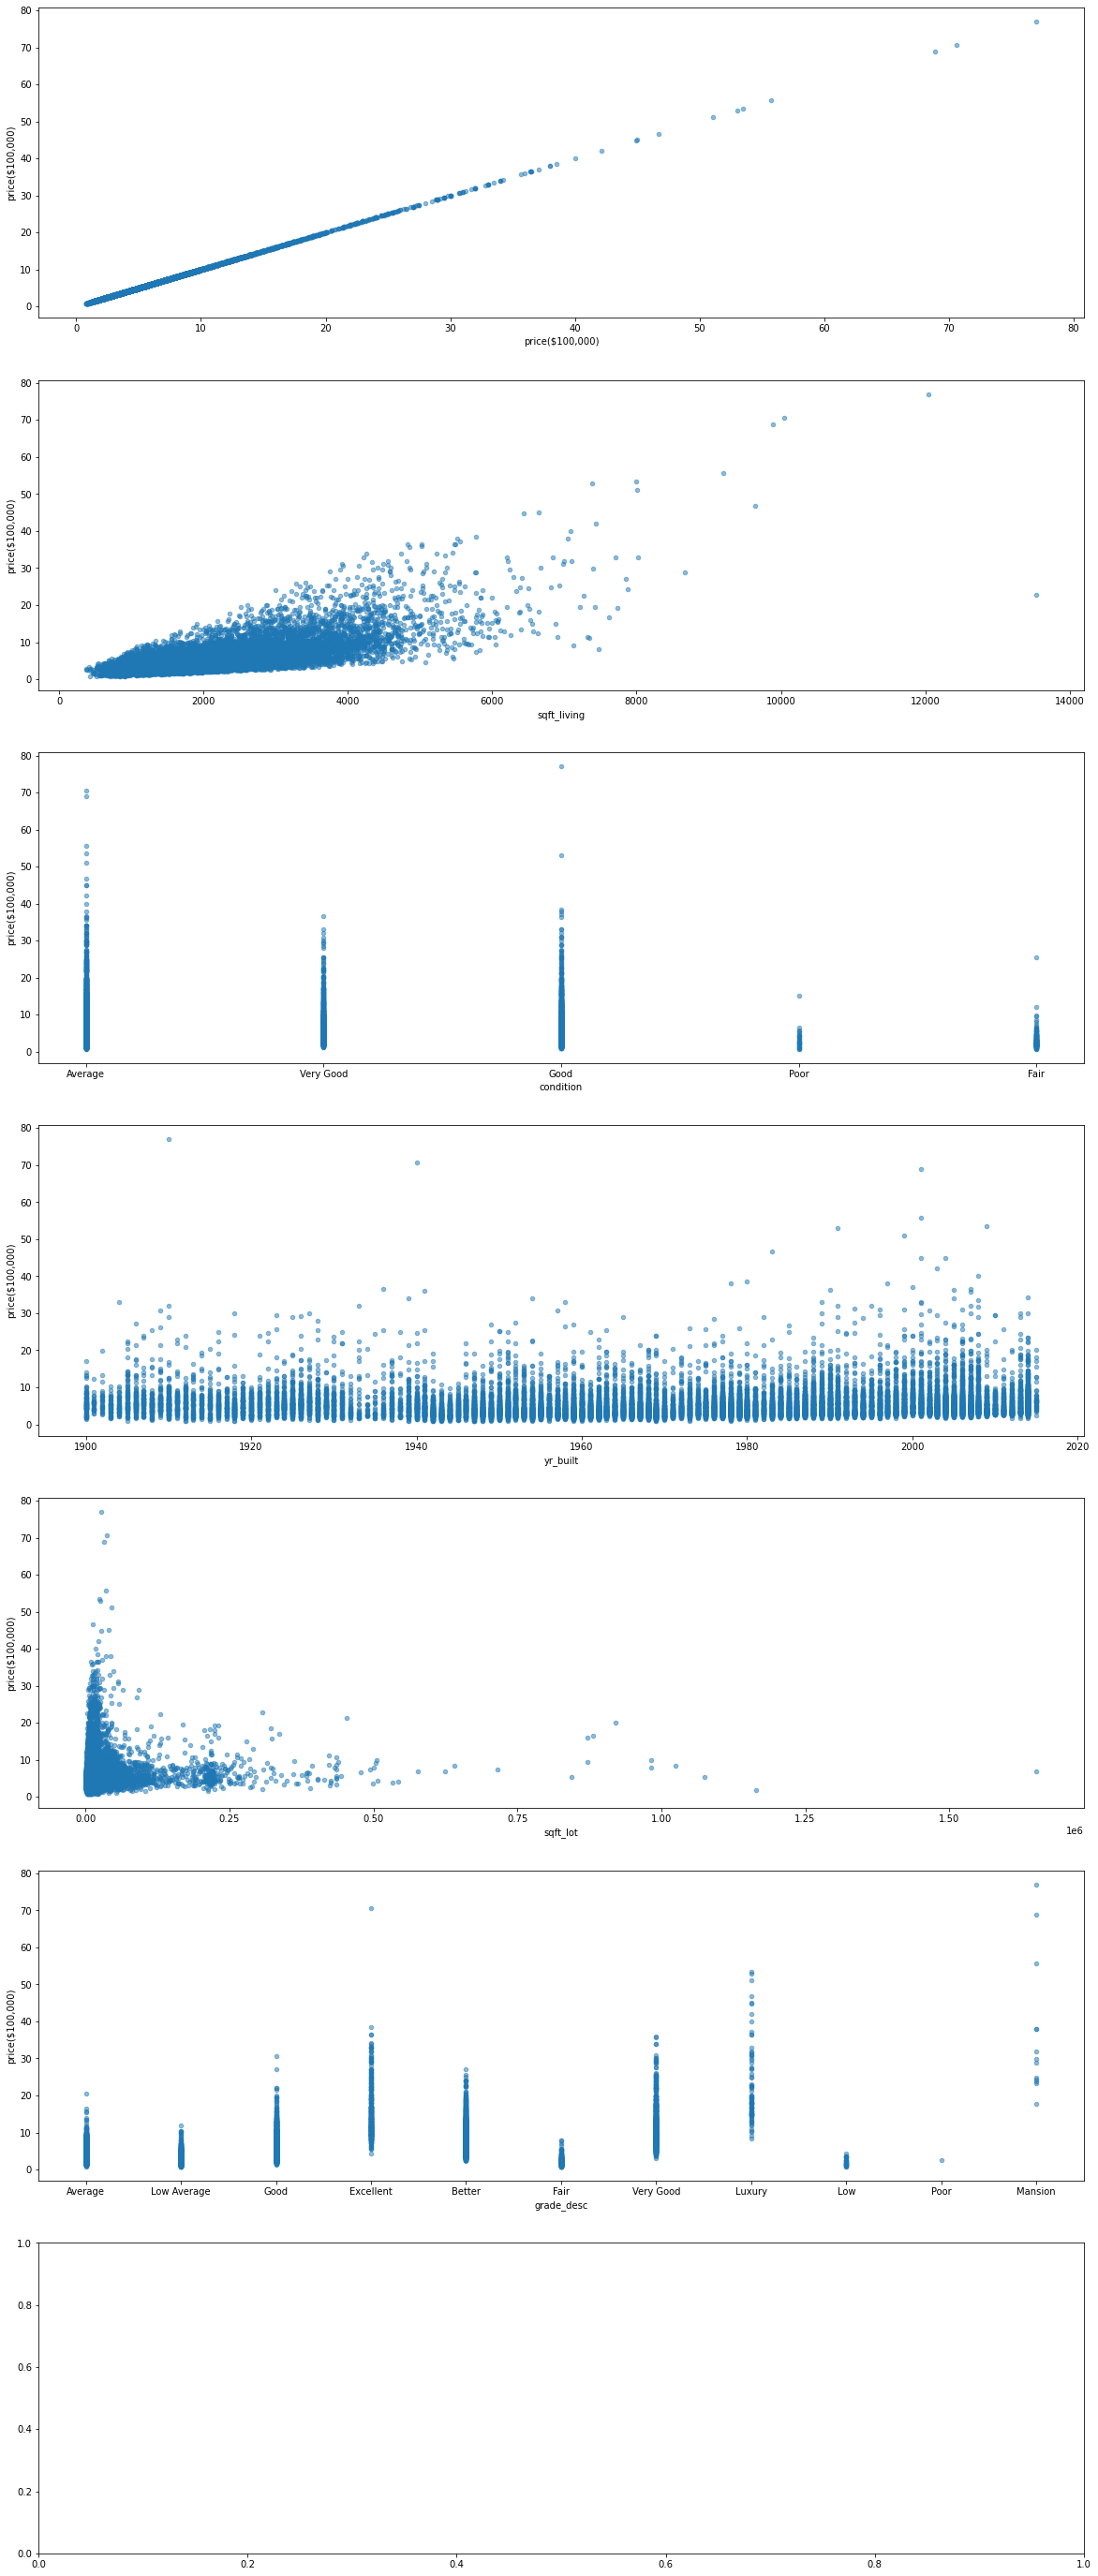

In [982]:
#Set up figure and axes
fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(20, 50))

#plot the variables
for xcol, ax in zip(np.array(data_cln.columns),axes):
    data_cln.plot(kind='scatter', x=xcol, y='price($100,000)', ax=ax, alpha=0.5)

In [983]:
data_x = data_cln[
#                     (data_cln['bedrooms']<9)&
#                   (data_cln['bathrooms']<=5)&
#                   (data_cln['floors']<=3)&
                  (data_cln['sqft_living']<=6000)&
                  (data_cln['sqft_lot']<=250000)
                 &(data_cln['price($100,000)']<=10)
                 ]


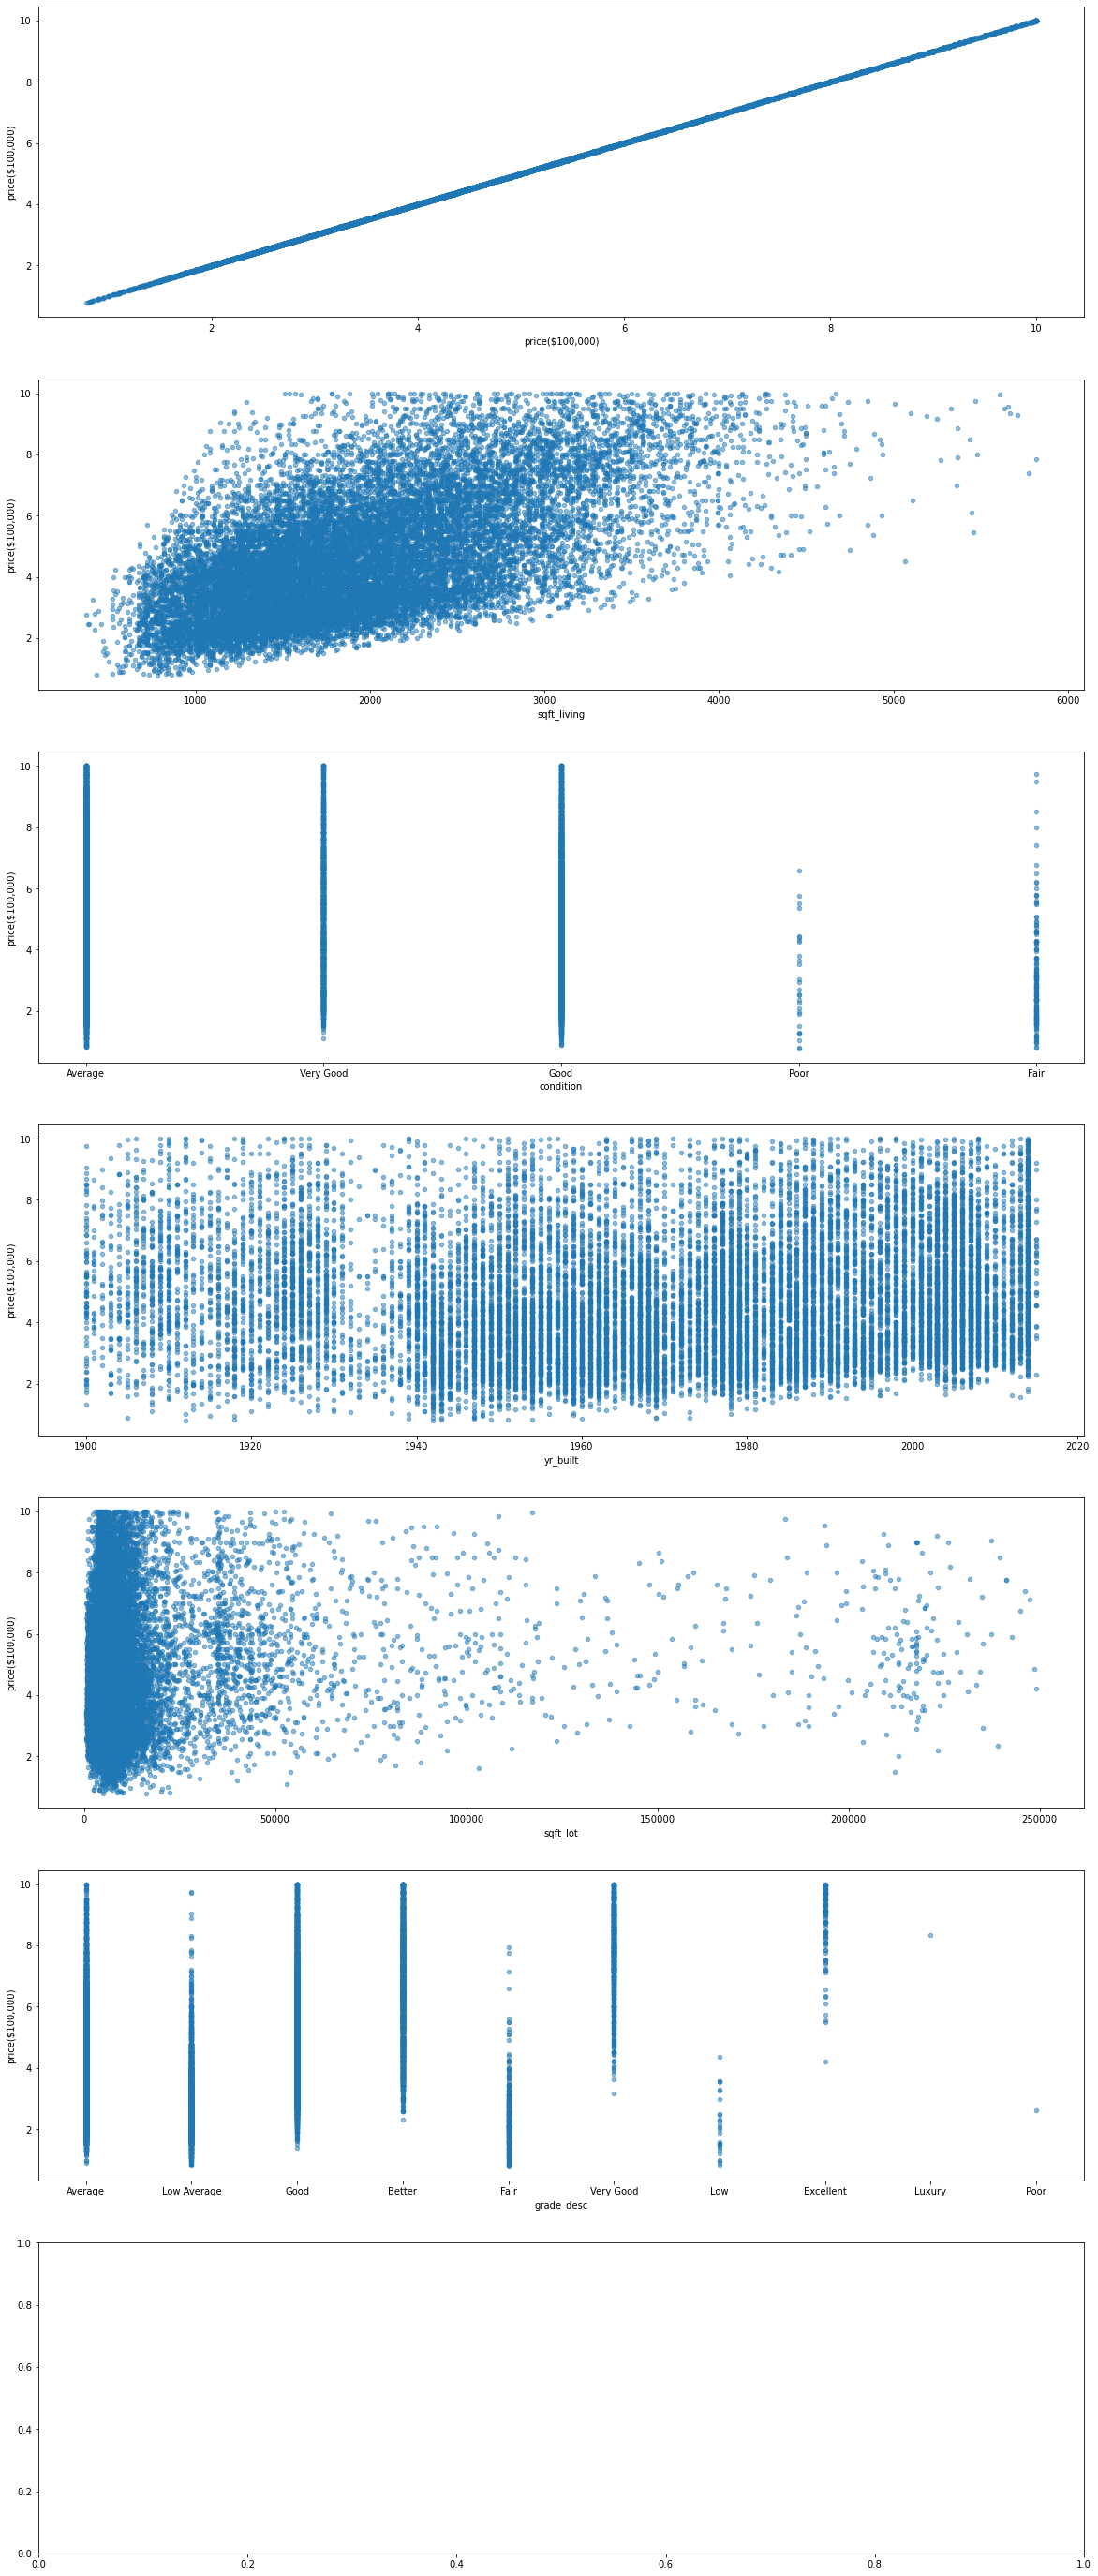

In [984]:
#Set up figure and axes
fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(20, 50))

#plot the variables
for xcol, ax in zip(np.array(data_x.columns),axes):
    data_x.plot(kind='scatter', x=xcol, y='price($100,000)', ax=ax, alpha=0.5)

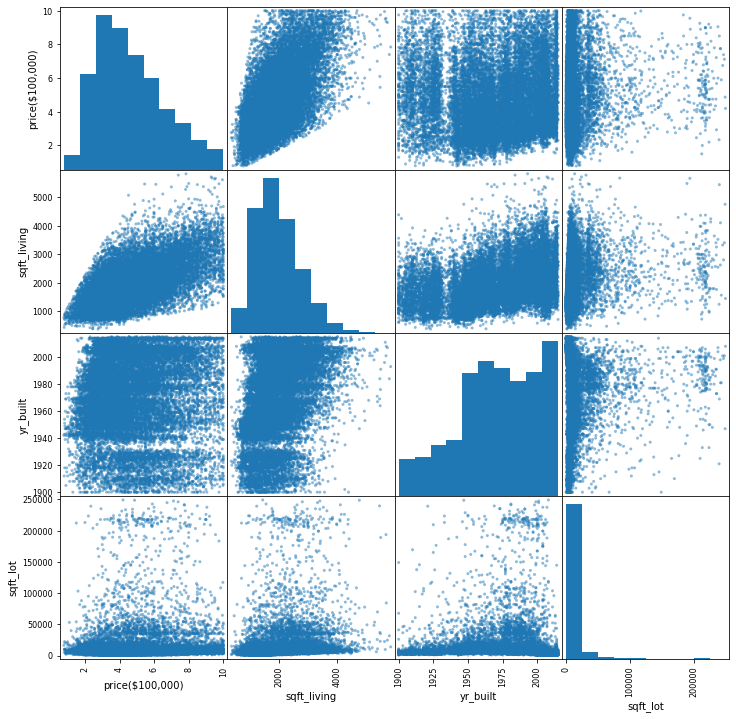

In [985]:
pd.plotting.scatter_matrix(data_x, figsize=[12, 12]);

In [986]:
data_x = data_x.drop(['yr_built'],axis=1).reset_index()#'sqft_lot',

In [987]:
data_x = data_x.drop(['id'],axis=1)

In [988]:
data_x['grade_desc'].value_counts()

Average        8922
Good           5854
Better         2203
Low Average    2027
Very Good       684
Fair            238
Excellent        89
Low              27
Luxury            1
Poor              1
Name: grade_desc, dtype: int64

In [989]:
data_x = data_x[(data_x['grade_desc']!='Luxury')]
data_x = data_x[(data_x['grade_desc']!='Poor')]

In [990]:
data_x['grade_desc'].value_counts()

Average        8922
Good           5854
Better         2203
Low Average    2027
Very Good       684
Fair            238
Excellent        89
Low              27
Name: grade_desc, dtype: int64

In [991]:
pr_x = data_x['price($100,000)']
data_x.drop(['price($100,000)'],axis=1,inplace=True)

data_x


sqft_living  condition  sqft_lot   grade_desc
0             1180    Average      5650      Average
1             2570    Average      7242      Average
2              770    Average     10000  Low Average
3             1960  Very Good      5000      Average
4             1680    Average      8080         Good
...            ...        ...       ...          ...
20041         1530    Average      1131         Good
20042         2310    Average      5813         Good
20043         1020    Average      1350      Average
20044         1600    Average      2388         Good
20045         1020    Average      1076      Average

[20044 rows x 4 columns]

In [992]:
# #separate the price column
# price_prep = data_cln['price($100,000)']

# #separate dataframe for other variables
data_prep = data_cln.drop(['price($100,000)'],axis=1)

# #preview the data
# data_prep.head()

In [993]:
# data_x.drop(['condition','grade_desc','bathrooms','grade#'],axis=1,inplace=True)


From visual inspection, we see that the features forming vertical plots are categorical variables. They are:

1. bedrooms
2. bathrooms
3. floors
5. grade

The only continuous variable is `sqft_living`.

Since the values for all the variables is numeric, we won't have to encode them for our regression analysis. 

Lets take a look at `sqft_living` to check if it will need any transformations.

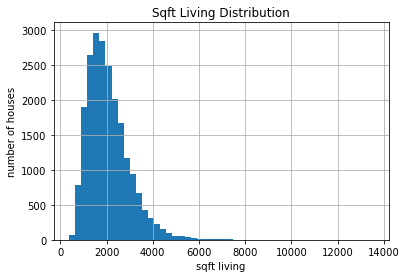

In [994]:
#check for normalization
#plot a histogram to check the distribution

#set up figure and axis
fig,ax = plt.subplots()

#plot the data
data_prep['sqft_living'].hist(bins=50);

#labels and titles
ax.set_title('Sqft Living Distribution');
ax.set_xlabel('sqft living');
ax.set_ylabel('number of houses');

We can see that it is a skewed normal curve. 

Linear regression models perform better with variables distributed normally. Therefore, it will be in our beenefit to transform this variable.

We can use some transformation techniques to improve the normal distribution characteristics for this variable.

Before we start transforming our dataset, lets split the data into train and test sets to ensure that we don't skew our training data with test characterestics. We will applly transformations to both sets of data separately.

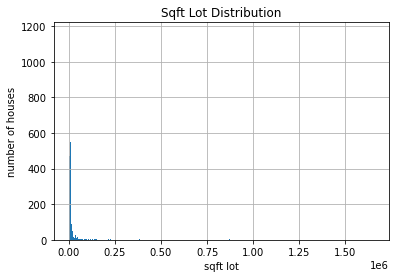

In [995]:
#check for normalization
#plot a histogram to check the distribution

#set up figure and axis
fig,ax = plt.subplots()

#plot the data
data_prep['sqft_lot'].hist(bins='auto');

#labels and titles
ax.set_title('Sqft Lot Distribution');
ax.set_xlabel('sqft lot');
ax.set_ylabel('number of houses');

Lets split our data into train and test sets.

In [996]:
#use train test split to separate the data
X_train, X_test, pr_train, pr_test = train_test_split(data_x, 
                                                      pr_x, 
                                                      random_state=42, 
                                                      test_size=0.25,
                                                     stratify=data_x['grade_desc'])

In [997]:
X_train, X_test

(       sqft_living  condition  sqft_lot   grade_desc
 11623         2640    Average     10720         Good
 4822          1970    Average     54450         Good
 13762         2600       Good     15064         Good
 8633          1900    Average      8160      Average
 17769         2120  Very Good      9442      Average
 ...            ...        ...       ...          ...
 1053          1480    Average      5670  Low Average
 13269         1520       Good      5649      Average
 5042          1280       Good      5065  Low Average
 18810         4000    Average      6713       Better
 2338           700  Very Good      5200  Low Average
 
 [15033 rows x 4 columns],
        sqft_living condition  sqft_lot grade_desc
 18151         1390      Good      9680    Average
 19713         1572   Average      4000       Good
 15068          940      Good      7125    Average
 3067          1850      Good      8250    Average
 3126          1330      Good      8636    Average
 ...            .

Lets apply log transformation to the `sqft_living` data and check the distribution again.

In [998]:
#use np.log to map the sqft_living column

#copy the datasets
X_train_log = X_train.copy()
X_test_log = X_test.copy()

#transform the X_train data
X_train_log['sqft_living_log'] = X_train['sqft_living'].map(lambda x: np.log(x))
# X_train_log['bedrooms_log'] = X_train['bedrooms'].map(lambda x: np.log(x))
# X_train_log['floors_log'] = X_train['floors'].map(lambda x: np.log(x))

X_train_log['sqft_lot_log'] = X_train['sqft_lot'].map(lambda x: np.log(x))


#transform the X_test data
X_test_log['sqft_living_log'] = X_test['sqft_living'].map(lambda x: np.log(x))
# X_test_log['bedrooms_log'] = X_train['bedrooms'].map(lambda x: np.log(x))
# X_test_log['floors_log'] = X_train['floors'].map(lambda x: np.log(x))
X_test_log['sqft_lot_log'] = X_test['sqft_lot'].map(lambda x: np.log(x))


In [999]:
X_train_log

sqft_living  condition  sqft_lot   grade_desc  sqft_living_log  \
11623         2640    Average     10720         Good         7.878534   
4822          1970    Average     54450         Good         7.585789   
13762         2600       Good     15064         Good         7.863267   
8633          1900    Average      8160      Average         7.549609   
17769         2120  Very Good      9442      Average         7.659171   
...            ...        ...       ...          ...              ...   
1053          1480    Average      5670  Low Average         7.299797   
13269         1520       Good      5649      Average         7.326466   
5042          1280       Good      5065  Low Average         7.154615   
18810         4000    Average      6713       Better         8.294050   
2338           700  Very Good      5200  Low Average         6.551080   

       sqft_lot_log  
11623      9.279866  
4822      10.905038  
13762      9.620063  
8633       9.006999  
17769      9.152923  
...             ...  
1053       8.642944  
13269      8.639234  
5042       8.530109  
18810      8.811801  
2338       8.556414  

[15033 rows x 6 columns]

In [1000]:
data_tr_log = X_train_log.drop(['sqft_living','sqft_lot'],axis=1)
data_test_log = X_test_log.drop(['sqft_living','sqft_lot'],axis=1)

In [1001]:
#drop the original columns
# X_train_log.drop(['sqft_living','sqft_lot'],axis=1,inplace=True)
# X_test_log.drop(['sqft_living','sqft_lot'],axis=1,inplace=True)
# X_train_log.drop(['sqft_living'],axis=1,inplace=True)
# X_test_log.drop(['sqft_living'],axis=1,inplace=True)

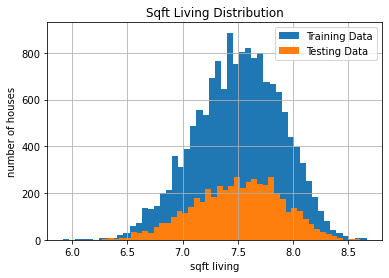

In [1002]:
#plot the training and testing data

#set up figure and axis
fig,ax = plt.subplots()


#plot the data
data_tr_log['sqft_living_log'].hist(bins=50,label='Training Data');


data_test_log['sqft_living_log'].hist(bins=50,label='Testing Data');

#labels and titles
ax.set_title('Sqft Living Distribution');
ax.set_xlabel('sqft living');
ax.set_ylabel('number of houses');
ax.legend();

In [1003]:
scaler = StandardScaler()
data_tr_log['sqft_living_log_scaled'] = scaler.fit_transform(np.array(data_tr_log['sqft_living_log']).reshape(-1,1))
data_tr_log['sqft_lot_log_scaled'] = scaler.fit_transform(np.array(data_tr_log['sqft_lot_log']).reshape(-1,1))

# X_train_log['sqft_bedrooms_scaled'] = scaler.fit_transform(np.array(X_train_log['bedrooms']).reshape(-1,1))
# X_train_log['sqft_floors_scaled'] = scaler.fit_transform(np.array(X_train_log['floors']).reshape(-1,1))

# scaled_df = pd.DataFrame(scaled_df, columns=['sqft_living_log_scaled'])

# X_train_log['sqft_living_log_scaled'] = scaled_df['sqft_living_log_scaled']
# X_train_log = X_train_log.drop(['sqft_living_log','bedrooms','floors'],axis=1)
data_tr_log = data_tr_log.drop(['sqft_living_log','sqft_lot_log'],axis=1)

# X_train_log = X_train_log.drop(['sqft'])

In [1004]:
data_test_log['sqft_living_log_scaled'] = scaler.fit_transform(np.array(data_test_log['sqft_living_log']).reshape(-1,1))
data_test_log['sqft_lot_log_scaled'] = scaler.fit_transform(np.array(data_test_log['sqft_lot_log']).reshape(-1,1))

# X_test_log['sqft_bedrooms_scaled'] = scaler.fit_transform(np.array(X_test_log['bedrooms']).reshape(-1,1))
# X_test_log['sqft_floors_scaled'] = scaler.fit_transform(np.array(X_test_log['floors']).reshape(-1,1))

# X_test_log = X_test_log.drop(['sqft_living_log','bedrooms','floors'],axis=1)
data_test_log = data_test_log.drop(['sqft_living_log'],axis=1)


In [1005]:
# fig,ax = plt.subplots()


# #plot the data
# X_train_log['sqft_bedrooms_scaled'].hist(bins=5,label='Training Data');


# X_test_log['sqft_bedrooms_scaled'].hist(bins=5,label='Testing Data');

# #labels and titles
# ax.set_title('Scaled Bedrooms Distribution');
# ax.set_xlabel('Scaled Bedrooms');
# ax.set_ylabel('number of houses');
# ax.legend();



In [1006]:
# sns.kdeplot(X_train_log['sqft_bedrooms_scaled'], color='r');

In [1007]:
# X_train_log = X_train_log.drop(['bedrooms','floors'],axis=1)
# X_test_log = X_test_log.drop(['bedrooms','floors'],axis=1)


In [1008]:
X_train_ohe = pd.get_dummies(data_tr_log[['condition','grade_desc']], drop_first=True)#, prefix='cat'
X_test_ohe = pd.get_dummies(data_test_log[['condition','grade_desc']], drop_first=True)#, prefix='cat'

In [1009]:
X_train_pro = pd.concat([data_tr_log, X_train_ohe], axis=1)
X_test_pro = pd.concat([data_test_log, X_test_ohe], axis=1)
X_train_pro

condition   grade_desc  sqft_living_log_scaled  sqft_lot_log_scaled  \
11623    Average         Good                0.960756             0.402084   
4822     Average         Good                0.210845             2.306024   
13762       Good         Good                0.921646             0.800635   
8633     Average      Average                0.118165             0.082412   
17769  Very Good      Average                0.398825             0.253366   
...          ...          ...                     ...                  ...   
1053     Average  Low Average               -0.521765            -0.344090   
13269       Good      Average               -0.453450            -0.348437   
5042        Good  Low Average               -0.893670            -0.476280   
18810    Average       Better                2.025160            -0.146269   
2338   Very Good  Low Average               -2.439715            -0.445463   

       condition_Fair  condition_Good  condition_Poor  condition_Very Good  \
11623               0               0               0                    0   
4822                0               0               0                    0   
13762               0               1               0                    0   
8633                0               0               0                    0   
17769               0               0               0                    1   
...               ...             ...             ...                  ...   
1053                0               0               0                    0   
13269               0               1               0                    0   
5042                0               1               0                    0   
18810               0               0               0                    0   
2338                0               0               0                    1   

       grade_desc_Better  grade_desc_Excellent  grade_desc_Fair  \
11623                  0                     0                0   
4822                   0                     0                0   
13762                  0                     0                0   
8633                   0                     0                0   
17769                  0                     0                0   
...                  ...                   ...              ...   
1053                   0                     0                0   
13269                  0                     0                0   
5042                   0                     0                0   
18810                  1                     0                0   
2338                   0                     0                0   

       grade_desc_Good  grade_desc_Low  grade_desc_Low Average  \
11623                1               0                       0   
4822                 1               0                       0   
13762                1               0                       0   
8633                 0               0                       0   
17769                0               0                       0   
...                ...             ...                     ...   
1053                 0               0                       1   
13269                0               0                       0   
5042                 0               0                       1   
18810                0               0                       0   
2338                 0               0                       1   

       grade_desc_Very Good  
11623                     0  
4822                      0  
13762                     0  
8633                      0  
17769                     0  
...                     ...  
1053                      0  
13269                     0  
5042                      0  
18810                     0  
2338                      0  

[15033 rows x 15 columns]

In [1010]:
X_train_mod = X_train_pro.drop(['condition','grade_desc'],axis=1)
X_test_mod = X_test_pro.drop(['condition','grade_desc'],axis=1)

In [1011]:
X_train_mod

sqft_living_log_scaled  sqft_lot_log_scaled  condition_Fair  \
11623                0.960756             0.402084               0   
4822                 0.210845             2.306024               0   
13762                0.921646             0.800635               0   
8633                 0.118165             0.082412               0   
17769                0.398825             0.253366               0   
...                       ...                  ...             ...   
1053                -0.521765            -0.344090               0   
13269               -0.453450            -0.348437               0   
5042                -0.893670            -0.476280               0   
18810                2.025160            -0.146269               0   
2338                -2.439715            -0.445463               0   

       condition_Good  condition_Poor  condition_Very Good  grade_desc_Better  \
11623               0               0                    0                  0   
4822                0               0                    0                  0   
13762               1               0                    0                  0   
8633                0               0                    0                  0   
17769               0               0                    1                  0   
...               ...             ...                  ...                ...   
1053                0               0                    0                  0   
13269               1               0                    0                  0   
5042                1               0                    0                  0   
18810               0               0                    0                  1   
2338                0               0                    1                  0   

       grade_desc_Excellent  grade_desc_Fair  grade_desc_Good  grade_desc_Low  \
11623                     0                0                1               0   
4822                      0                0                1               0   
13762                     0                0                1               0   
8633                      0                0                0               0   
17769                     0                0                0               0   
...                     ...              ...              ...             ...   
1053                      0                0                0               0   
13269                     0                0                0               0   
5042                      0                0                0               0   
18810                     0                0                0               0   
2338                      0                0                0               0   

       grade_desc_Low Average  grade_desc_Very Good  
11623                       0                     0  
4822                        0                     0  
13762                       0                     0  
8633                        0                     0  
17769                       0                     0  
...                       ...                   ...  
1053                        1                     0  
13269                       0                     0  
5042                        1                     0  
18810                       0                     0  
2338                        1                     0  

[15033 rows x 13 columns]

In [1012]:
# X_train_mod = X_train_mod.drop(['bedrooms'],axis=1)
# X_test_mod = X_test_mod.drop(['bedrooms'],axis=1)


This brings our Data Preparation to an end. We will now move on to modelling the variables.

In [1013]:
# #plot the training and testing data

# #set up figure and axis
# fig,ax = plt.subplots()


# #plot the data
# X_train_log['sqft_lot_log'].hist(bins=50,label='Training Data');

# X_test_log['sqft_lot_log'].hist(bins=50,label='Testing Data');

# #labels and titles
# ax.set_title('Sqft Lot Distribution');
# ax.set_xlabel('sqft lot');
# ax.set_ylabel('number of houses');
# ax.legend();

## Modelling

baseline
add features one by one and check for assumptions
use the statsmodel and check for assumptions
use scikit learn's featur selection option 
build the final model using thee best features and check for assumptions
Compute RMSE

We are going to start with a baseline model using the variable with the highest correlation to `price`.

During data processing, we found that `sqft_living` had the highest correlation. We will soleely use that variable to develop a baseline linear regression model. 

A baseline model is used to compare against models that have multiple variables. 

**talk a little more about why baseline models are important**

In [1014]:
base_model = LinearRegression()

We will be using cross vaalidation to perform multiple separate train-test splits within the training daatasets. 

**talk about immportance of cross validation and shufflee split to improve the confideence of regression results**

In [1015]:
splitter = ShuffleSplit(n_splits=10, test_size=0.25, random_state=0)

baseline_scores = cross_validate(
                                estimator=base_model,
                                X=np.array(X_train_mod['sqft_living_log_scaled']).reshape(-1,1), 
                                y=pr_train, 
                                return_train_score=True, 
                                cv=splitter
                                )

print('Train score:   ', baseline_scores['train_score'].mean())
print('Validation score:   ', baseline_scores['test_score'].mean())

Train score:    0.3440775863467408
Validation score:    0.3458965706625438


r-squared values

explain what these values are and what they mean

explain why validation score is more important

weak model, explain why it is a weak model

need mmore variables

Lets add thee second most correlated variable, `grade#` to the odel and see if it improves our results

In [1016]:
s_model=LinearRegression()
splitter = ShuffleSplit(n_splits=10, test_size=0.25, random_state=0)

second_model_scores = cross_validate(
                                estimator=s_model,
                                X=np.array(X_train_mod[['sqft_living_log_scaled','sqft_lot_log_scaled']]), 
                                y=pr_train, 
                                return_train_score=True, 
                                cv=splitter
                                )
print('Second Model including grade#')
print('Train score:   ', second_model_scores['train_score'].mean())
print('Validation score:   ', second_model_scores['test_score'].mean())
print()
print('Baseline Model with sqft_living_log')
print('Train score:   ', baseline_scores['train_score'].mean())
print('Validation score:   ', baseline_scores['test_score'].mean())

Second Model including grade#
Train score:    0.35389866429940514
Validation score:    0.3561359354884008

Baseline Model with sqft_living_log
Train score:    0.3440775863467408
Validation score:    0.3458965706625438


better model, still not goood enough, lets explore adding more variables

In [1017]:
# splitter = ShuffleSplit(n_splits=10, test_size=0.25, random_state=0)

# third_model_scores = cross_validate(
#                                 estimator=s_model,
#                                 X=np.array(X_train_mod[['sqft_living_log_scaled','sqft_lot_log_scaled','floors']]), 
#                                 y=pr_train, 
#                                 return_train_score=True, 
#                                 cv=splitter
#                                 )
# print('Third Model including bathrooms')
# print('Train score:   ', third_model_scores['train_score'].mean())
# print('Validation score:   ', third_model_scores['test_score'].mean())
# print()
# print('Second Model including grade#')
# print('Train score:   ', second_model_scores['train_score'].mean())
# print('Validation score:   ', second_model_scores['test_score'].mean())
# print()
# print('Baseline Model with sqft_living_log')
# print('Train score:   ', baseline_scores['train_score'].mean())
# print('Validation score:   ', baseline_scores['test_score'].mean())

no significant difference, adding bathrooms did not help alot, lets add more.

In [1018]:
# splitter = ShuffleSplit(n_splits=10, test_size=0.25, random_state=0)

# fourth_model_scores = cross_validate(
#                                 estimator=s_model,
#                                 X=np.array(X_train_log[['sqft_living_log','grade#','bathrooms','bedrooms']]), 
#                                 y=pr_train, 
#                                 return_train_score=True, 
#                                 cv=splitter
#                                 )
# print('Fourth Model including bedrooms')
# print('Train score:   ', fourth_model_scores['train_score'].mean())
# print('Validation score:   ', fourth_model_scores['test_score'].mean())
# print()
# print('Third Model including bathrooms')
# print('Train score:   ', third_model_scores['train_score'].mean())
# print('Validation score:   ', third_model_scores['test_score'].mean())
# print()
# print('Second Model including grade#')
# print('Train score:   ', second_model_scores['train_score'].mean())
# print('Validation score:   ', second_model_scores['test_score'].mean())
# print()
# print('Baseline Model with sqft_living_log')
# print('Train score:   ', baseline_scores['train_score'].mean())
# print('Validation score:   ', baseline_scores['test_score'].mean())

In [1019]:
# splitter = ShuffleSplit(n_splits=10, test_size=0.25, random_state=0)

# fifth_model_scores = cross_validate(
#                                 estimator=base_model,
#                                 X=np.array(X_train_log), 
#                                 y=pr_train, 
#                                 return_train_score=True, 
#                                 cv=splitter
#                                 )
# print('fifth Model including bedrooms')
# print('Train score:   ', fifth_model_scores['train_score'].mean())
# print('Validation score:   ', fifth_model_scores['test_score'].mean())
# print()
# print('Fourth Model including bedrooms')
# print('Train score:   ', fourth_model_scores['train_score'].mean())
# print('Validation score:   ', fourth_model_scores['test_score'].mean())
# print()
# print('Third Model including bathrooms')
# print('Train score:   ', third_model_scores['train_score'].mean())
# print('Validation score:   ', third_model_scores['test_score'].mean())
# print()
# print('Second Model including grade#')
# print('Train score:   ', second_model_scores['train_score'].mean())
# print('Validation score:   ', second_model_scores['test_score'].mean())
# print()
# print('Baseline Model with sqft_living_log')
# print('Train score:   ', baseline_scores['train_score'].mean())
# print('Validation score:   ', baseline_scores['test_score'].mean())

In [1020]:
sm.OLS(pr_train, sm.add_constant(X_train_mod)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        price($100,000)   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     1009.
Date:                Fri, 18 Nov 2022   Prob (F-statistic):               0.00
Time:                        02:15:03   Log-Likelihood:                -26727.
No. Observations:               15033   AIC:                         5.348e+04
Df Residuals:                   15019   BIC:                         5.359e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      3.9785      0.021    187.824      0.000       3.937       4.020
sqft_living_log_scaled     0.6748      0.017     39.617      0.000       0.641       0.708
sqft_lot_log_scaled       -0.1926      0.013    -15.077      0.000      -0.218      -0.168
condition_Fair            -0.0892      0.134     -0.667      0.505      -0.351       0.173
condition_Good             0.4013      0.028     14.408      0.000       0.347       0.456
condition_Poor             0.3772      0.331      1.138      0.255      -0.272       1.027
condition_Very Good        0.9824      0.045     21.643      0.000       0.893       1.071
grade_desc_Better          1.9887      0.046     43.627      0.000       1.899       2.078
grade_desc_Excellent       3.5583      0.180     19.802      0.000       3.206       3.911
grade_desc_Fair           -0.6102      0.112     -5.433      0.000      -0.830      -0.390
grade_desc_Good            0.8051      0.030     26.631      0.000       0.746       0.864
grade_desc_Low            -0.0105      0.324     -0.032      0.974      -0.646       0.625
grade_desc_Low Average    -0.4283      0.044     -9.789      0.000      -0.514      -0.343
grade_desc_Very Good       2.9156      0.073     40.191      0.000       2.773       3.058
==============================================================================
Omnibus:                      589.447   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              665.394
Skew:                           0.490   Prob(JB):                    3.25e-145
Kurtosis:                       3.321   Cond. No.                         33.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1021]:
X_train_RFECV = StandardScaler().fit_transform(X_train_mod)

model_RFECV = LinearRegression()

selector = RFECV(model_RFECV, cv=splitter)
ft = selector.fit(X_train_RFECV, pr_train)

print(ft.ranking_)

for index, col in enumerate(X_train_mod.columns):
    print(f"{col}:{selector.support_[index]}")

[1 1 3 1 2 1 1 1 1 1 4 1 1]
sqft_living_log_scaled:True
sqft_lot_log_scaled:True
condition_Fair:False
condition_Good:True
condition_Poor:False
condition_Very Good:True
grade_desc_Better:True
grade_desc_Excellent:True
grade_desc_Fair:True
grade_desc_Good:True
grade_desc_Low:False
grade_desc_Low Average:True
grade_desc_Very Good:True


In [1022]:
best_features = []
for index, col in enumerate(X_train_mod.columns):
    if selector.support_[index] == True:
        best_features.append(col)
print(best_features)


['sqft_living_log_scaled', 'sqft_lot_log_scaled', 'condition_Good', 'condition_Very Good', 'grade_desc_Better', 'grade_desc_Excellent', 'grade_desc_Fair', 'grade_desc_Good', 'grade_desc_Low Average', 'grade_desc_Very Good']


In [1023]:
X_test_mod

sqft_lot_log  sqft_living_log_scaled  sqft_lot_log_scaled  \
18151      9.177817               -0.665965             0.263365   
19713      8.294050               -0.353664            -0.763756   
15068      8.871365               -1.658816            -0.092796   
3067       9.017968                0.059632             0.077587   
3126       9.063695               -0.777958             0.130731   
...             ...                     ...                  ...   
4701       7.323831               -1.402224            -1.891351   
999        9.094817               -0.629705             0.166902   
15645      9.057073                0.369225             0.123034   
7756       9.104980                0.923412             0.178713   
10299      8.005033               -0.816414            -1.099653   

       condition_Fair  condition_Good  condition_Poor  condition_Very Good  \
18151               0               1               0                    0   
19713               0               0               0                    0   
15068               0               1               0                    0   
3067                0               1               0                    0   
3126                0               1               0                    0   
...               ...             ...             ...                  ...   
4701                0               0               0                    0   
999                 0               0               0                    0   
15645               0               0               0                    0   
7756                0               0               0                    0   
10299               0               0               0                    0   

       grade_desc_Better  grade_desc_Excellent  grade_desc_Fair  \
18151                  0                     0                0   
19713                  0                     0                0   
15068                  0                     0                0   
3067                   0                     0                0   
3126                   0                     0                0   
...                  ...                   ...              ...   
4701                   0                     0                0   
999                    0                     0                0   
15645                  0                     0                0   
7756                   0                     0                0   
10299                  0                     0                0   

       grade_desc_Good  grade_desc_Low  grade_desc_Low Average  \
18151                0               0                       0   
19713                1               0                       0   
15068                0               0                       0   
3067                 0               0                       0   
3126                 0               0                       0   
...                ...             ...                     ...   
4701                 1               0                       0   
999                  0               0                       0   
15645                1               0                       0   
7756                 1               0                       0   
10299                0               0                       0   

       grade_desc_Very Good  
18151                     0  
19713                     0  
15068                     0  
3067                      0  
3126                      0  
...                     ...  
4701                      0  
999                       0  
15645                     0  
7756                      0  
10299                     0  

[5011 rows x 14 columns]

In [1024]:
final_model = LinearRegression()
final_model.fit(X_train_mod[best_features], pr_train)
final_model.score(X_test_mod[best_features], pr_test)

0.4521286403533378

In [1026]:
sm.OLS(pr_train, sm.add_constant(X_train_mod[best_features])).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        price($100,000)   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     1311.
Date:                Fri, 18 Nov 2022   Prob (F-statistic):               0.00
Time:                        02:20:30   Log-Likelihood:                -26728.
No. Observations:               15033   AIC:                         5.348e+04
Df Residuals:                   15022   BIC:                         5.356e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      3.9780      0.021    188.675      0.000       3.937       4.019
sqft_living_log_scaled     0.6751      0.017     39.949      0.000       0.642       0.708
sqft_lot_log_scaled       -0.1928      0.013    -15.155      0.000      -0.218      -0.168
condition_Good             0.4018      0.028     14.486      0.000       0.347       0.456
condition_Very Good        0.9828      0.045     21.686      0.000       0.894       1.072
grade_desc_Better          1.9889      0.046     43.677      0.000       1.900       2.078
grade_desc_Excellent       3.5586      0.180     19.808      0.000       3.206       3.911
grade_desc_Fair           -0.6017      0.112     -5.394      0.000      -0.820      -0.383
grade_desc_Good            0.8054      0.030     26.651      0.000       0.746       0.865
grade_desc_Low Average    -0.4290      0.044     -9.850      0.000      -0.514      -0.344
grade_desc_Very Good       2.9157      0.072     40.221      0.000       2.774       3.058
==============================================================================
Omnibus:                      590.315   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              666.464
Skew:                           0.490   Prob(JB):                    1.90e-145
Kurtosis:                       3.321   Cond. No.                         17.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1027]:

# from itertools import combinations

# features = np.array(['bedrooms', 'bathrooms', 'floors', 'yr_built', 'grade#', 'cond_code', 'sqft_lot_log'])

# # Make a dataframe to hold the results (not strictly necessary
# # but it makes the output easier to read)
# results_df = pd.DataFrame(columns=features)

# # Selecting 
# results_df = results_df.append({
#     "train_score": baseline_scores["train_score"].mean(),
#     "val_score": baseline_scores["test_score"].mean()
# }, ignore_index=True)

# # Selecting 1 additional feature

# for feature in features:
#     scores = cross_validate(
#         estimator=s_model,
#         X=X_train_log[['sqft_living_log', feature]],
#         y=pr_train,
#         return_train_score=True,
#         cv=splitter
#     )
#     # Note: this technique of appending to a df is quite inefficient
#     # Here it works because it's only happening 6 times, but avoid
#     # doing this for a whole dataset
#     results_df = results_df.append({
#         feature: "Yes",
#         "train_score": scores["train_score"].mean(),
#         "val_score": scores["test_score"].mean()
#     }, ignore_index=True)

# # Selecting 2 additional features
# for (feature1, feature2) in list(combinations(features, 2)):
#     scores = cross_validate(
#         estimator=s_model,
#         X=X_train_log[['sqft_living_log', feature1, feature2]],
#         y=pr_train,
#         return_train_score=True,
#         cv=splitter
#     )
#     results_df = results_df.append({
#         feature1: "Yes",
#         feature2: "Yes",
#         "train_score": scores["train_score"].mean(),
#         "val_score": scores["test_score"].mean()
#     }, ignore_index=True)

# # Selecting 3 additional features
# for (feature1, feature2, feature3) in list(combinations(features, 3)):
#     scores = cross_validate(
#         estimator=s_model,
#         X=X_train_log[['sqft_living_log', feature1, feature2, feature3]],
#         y=pr_train,
#         return_train_score=True,
#         cv=splitter
#     )
#     results_df = results_df.append({
#         feature1: "Yes",
#         feature2: "Yes",
#         feature3: "Yes",
#         "train_score": scores["train_score"].mean(),
#         "val_score": scores["test_score"].mean()
#     }, ignore_index=True)

# # Selecting 4 additional features
# for (feature1, feature2, feature3, feature4) in list(combinations(features, 4)):
#     scores = cross_validate(
#         estimator=s_model,
#         X=X_train_log[['sqft_living_log', feature1, feature2, feature3, feature4]],
#         y=pr_train,
#         return_train_score=True,
#         cv=splitter
#     )
#     results_df = results_df.append({
#         feature1: "Yes",
#         feature2: "Yes",
#         feature3: "Yes",
#         feature4: "Yes",
#         "train_score": scores["train_score"].mean(),
#         "val_score": scores["test_score"].mean()
#     }, ignore_index=True)
    
# # Selecting 5 additional features
# for (feature1, feature2, feature3, feature4, feature5) in list(combinations(features, 5)):
#     scores = cross_validate(
#         estimator=s_model,
#         X=X_train_log[['sqft_living_log', feature1, feature2, feature3, feature4, feature5]],
#         y=pr_train,
#         return_train_score=True,
#         cv=splitter
#     )
#     results_df = results_df.append({
#         feature1: "Yes",
#         feature2: "Yes",
#         feature3: "Yes",
#         feature4: "Yes",
#         feature5: "Yes",
#         "train_score": scores["train_score"].mean(),
#         "val_score": scores["test_score"].mean()
#     }, ignore_index=True)

# # Selecting 6 additional features
# for (feature1, feature2, feature3, feature4, feature5, feature6) in list(combinations(features, 6)):
#     scores = cross_validate(
#         estimator=s_model,
#         X=X_train_log[['sqft_living_log', feature1, feature2, feature3, feature4, feature5, feature6]],
#         y=pr_train,
#         return_train_score=True,
#         cv=splitter
#     )
#     results_df = results_df.append({
#         feature1: "Yes",
#         feature2: "Yes",
#         feature3: "Yes",
#         feature4: "Yes",
#         feature5: "Yes",
#         feature6: "Yes",
#         "train_score": scores["train_score"].mean(),
#         "val_score": scores["test_score"].mean()
#     }, ignore_index=True)
    
# # Selecting 7 additional features
# for (feature1, feature2, feature3, feature4, feature5, feature6, feature7) in list(combinations(features, 7)):
#     scores = cross_validate(
#         estimator=s_model,
#         X=X_train_log[['sqft_living_log', feature1, feature2, feature3, feature4, feature5, feature6, feature7]],
#         y=pr_train,
#         return_train_score=True,
#         cv=splitter
#     )
#     results_df = results_df.append({
#         feature1: "Yes",
#         feature2: "Yes",
#         feature3: "Yes",
#         feature4: "Yes",
#         feature5: "Yes",
#         feature6: "Yes",
#         feature7: "Yes",
#         "train_score": scores["train_score"].mean(),
#         "val_score": scores["test_score"].mean()
#     }, ignore_index=True)
# # # Including all 3 additional features
# # results_df = results_df.append({
# #     "min_age": "Yes", "max_age": "Yes", "difficulty_level": "Yes",
# #     "train_score": second_model_scores["train_score"].mean(),
# #     "val_score": second_model_scores["test_score"].mean()
# # }, ignore_index=True)

# # Fill in remaining values where appropriate
# results_df["piece_count"] = "Yes"
# results_df.fillna("No", inplace=True)

# results_df.sort_values(by=["val_score"],ascending=False)

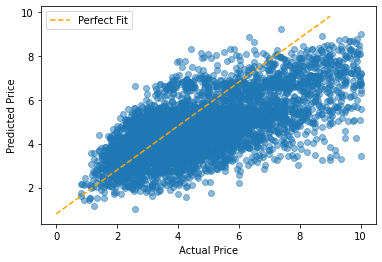

In [1028]:
preds = final_model.predict(X_test_mod[best_features])
fig, ax = plt.subplots()

perfect_line = np.arange(pr_test.min(), pr_test.max())
ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
ax.scatter(pr_test, preds, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

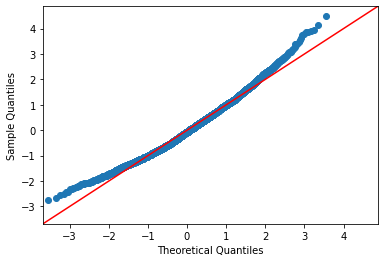

In [1029]:
import scipy.stats as stats
residuals = (pr_test - preds)
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);




<AxesSubplot:>

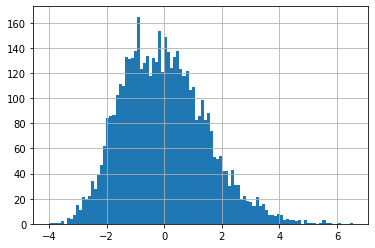

In [1030]:
residuals.hist(bins=100)


In [1031]:
#multi-colinearity
X_f=X_train_log.copy()
# X_f['tot']=X_f['bedrooms']+X_f['bathrooms']
# X_f.drop(['bedrooms','bathrooms'],axis=1,inplace=True)
a = X_train_mod[best_features]
vif = [variance_inflation_factor(a.values,i) for i in range(a.shape[1])]
pd.Series(vif, index=a.columns, name='VIF')

sqft_living_log_scaled    1.969660
sqft_lot_log_scaled       1.184706
condition_Good            1.178371
condition_Very Good       1.045487
grade_desc_Better         1.232445
grade_desc_Excellent      1.027417
grade_desc_Fair           1.080438
grade_desc_Good           1.203046
grade_desc_Low Average    1.328202
grade_desc_Very Good      1.143014
Name: VIF, dtype: float64

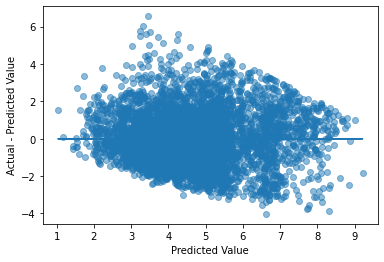

In [1032]:
fig, ax = plt.subplots()

ax.scatter(preds, residuals, alpha=0.5)
ax.plot(preds, [0 for i in range(len(X_test))])
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual - Predicted Value");

## Results

In [ ]:
Interpret the final model

## Next Steps

We still don't know whether these NaN values are missing data or intentionally left blank. Lets pllot them on a map using the `lat` and `long` columns to see whether the NaN values are on the waterfront or not.

In [27]:


# mapbox_access_token = open(".mapbox_token").read()

fig = go.Figure(go.Scattermapbox(
        lat=['38.91427','38.91538','38.91458',
             '38.92239','38.93222','38.90842',
             '38.91931','38.93260','38.91368',
             '38.88516','38.921894','38.93206',
             '38.91275'],
        lon=['-77.02827','-77.02013','-77.03155',
             '-77.04227','-77.02854','-77.02419',
             '-77.02518','-77.03304','-77.04509',
             '-76.99656','-77.042438','-77.02821',
             '-77.01239'],
        mode='markers',
        marker=go.scattermapbox.Marker(
            size=9
        ),
        text=["The coffee bar","Bistro Bohem","Black Cat",
             "Snap","Columbia Heights Coffee","Azi's Cafe",
             "Blind Dog Cafe","Le Caprice","Filter",
             "Peregrine","Tryst","The Coupe",
             "Big Bear Cafe"],
    ))

# fig.update_layout(
#     autosize=True,
#     hovermode='closest',
#     mapbox=dict(
#         accesstoken=mapbox_access_token,
#         bearing=0,
#         center=dict(
#             lat=38.92,
#             lon=-77.07
#         ),
#         pitch=0,
#         zoom=10
#     ),
# )

fig.show()